## DOCUMENTATION // "WINTER STORM ELLIOTT" // API-SQL-PROJECT // GROUP 3

![weather map of the United States for winter storm Elliott](/Users/christoph/neuefische/da-sql-api-project-1/images/winter_storm_elliott.jpg)

**This notebook documents the work process of group 3 for data retrieval, cleaning and analysis on the winter storm Elliott (December 2022)**

##### Process Overview

0. Background
1. Importing Relevant Libraries and Packages
2. Retrieving Flights Data
3. Retrieving Weather Data
4. Data Analysis




## 0. Background

![air plane snowstorm](/Users/christoph/neuefische/da-sql-api-project-1/images/plane_winter_storm.jpeg)

**Winter Storm "Elliott"**

From December 21 to 26, 2022, a historic extratropical cyclone created winter storm conditions, including blizzards, high winds, snowfall, or record cold temperatures across the majority of the United States and parts of Canada. Areas which experienced blizzard conditions included parts of Minnesota, Iowa, Wisconsin, Michigan, Ohio, New York and Ontario, with the Buffalo area of New York and the Fort Erie and Kingston areas of Ontario experiencing almost two full days of blizzard/zero-visibility conditions on December 23 and 24. The cold wave affected all U.S. states from Colorado to the eastern seaboard and as far south as Miami, Florida. On December 24, 110 million people across 36 states were subject to wind chill alerts.

Additional noteworthy weather events in the time period considered (December 2022):

**Tornado outbreak of December 12–15, 2022**

A four-day tornado outbreak affected the Central and Southern United States in mid-December 2022. The outbreak produced strong tornadoes in Oklahoma, Texas, Louisiana, Mississippi, and Georgia, resulting in severe damage and three fatalities.

**Scope of analysis - Assessing Air Traffic Impact on 8 Major Hubs**

In assessing the impact of the December 2022 winter storm on US airline traffic, we narrowed our analysis to some the busiest airports in the continental United States. The airport locations are well dispersed and cover all major geographical areas: East Coast, Mid-West, South, West Coast

|   | Airport Name  | IATA/FAA Code | City | U.S. State |
|---|---|---|---|---|
| 1 | Hartsfield–Jackson Atlanta International Airport | ATL | Atlanta | GA |
| 2 | Dallas/Fort Worth International Airport | DFW | Dallas & Fort Worth | TX |
| 3 | Denver International Airport | DEN | Denver | CO |
| 4 | O'Hare International Airport | ORD | Chicago | IL |
| 5 | Los Angeles International Airport | LAX  | Los Angeles | CA |
| 6 | John F. Kennedy International Airport | JFK | New York City | NY |
| 7 | Newark Liberty International Airport  | EWR | Newark & New York City | NJ |
| 8 | LaGuardia Airport | LGA | New York City | NY |


## 1. Importing Relevant Libraries and Packages

In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import json # package for handling json files
import time # package for delaying API queries

In [6]:
# Import the get_engine function from our sql_functions.
from sql_functions import get_engine, get_dataframe, get_sql_config #adjust this as necessary to match your sql_functions.py connection methods

## 2. Retrieving Flights Data

#### 2.1. Downloading csv file with flights data for specific year/month

**Datasource:** [US Bureau of Transportation](https://transtats.bts.gov)

**Time period:** Monthly data for December of 2018 - 2022

In [ ]:
# Specifies path for saving file
path ='data/' 
# Create the data folder
!mkdir {path}

In [ ]:
# function to get specified csv file from the website https://transtats.bts.gov

def download_data(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    url = (f'https://transtats.bts.gov/PREZIP/{zip_file}')
    # Download the database
    r = requests.get(f'{url}', verify=False)
    # Save database to local file storage
    with open(path+zip_file, 'wb') as f:
        f.write(r.content)
        print(f'--> zip_file with name: {zip_file} downloaded succesfully.' )

In [ ]:
# function to extract the csv files inside the zip files:

def extract_zip(year, month):
    # Get the file from the website https://transtats.bts.gov
    zip_file = f'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_{year}_{month}.zip'
    with ZipFile(path+zip_file, 'r') as zip_ref:
        zip_ref.extractall(path)
        csv_file =  zip_ref.namelist()[0]
        print(f'--> zip_file was succesfully extracted to: {csv_file}.' )

In [ ]:
# specifying time period to be analyzed:
years_list = [2018, 2019, 2020, 2021, 2022]
months_list = [12]

# download flights data as zipfile(s) using nested loop to specify month/years to define the range of the data: 
for year in years_list:
    for month in months_list:
        download_data(year, month)
        extract_zip(year, month)

#### 2.2. Naming CSV files for December 2018 until 2022

In [ ]:
# define the name of the csv file to be read in:
csv_file_2018_12 = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_12.csv'

# reading in data:
df_2018_12 = pd.read_csv(path+csv_file_2018_12, low_memory = False)
display(df_2018_12.shape)
display(df_2018_12.head(10))

In [ ]:
# defining the name of the csv file to be read in:
csv_file_2019_12 = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_12.csv'

# reading in data:
df_2019_12 = pd.read_csv(path+csv_file_2019_12, low_memory = False)
display(df_2019_12.shape)
display(df_2019_12.head(10))

In [ ]:
# defining the name of the csv file to be read in:
csv_file_2020_12 = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_12.csv'

# reading in data:
df_2020_12 = pd.read_csv(path+csv_file_2020_12, low_memory = False)
display(df_2020_12.shape)
display(df_2020_12.head(10))

In [ ]:
# defining the name of the csv file to be read in:
csv_file_2021_12 = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2021_12.csv'

# reading in data:
df_2021_12 = pd.read_csv(path+csv_file_2021_12, low_memory = False)
display(df_2021_12.shape)
display(df_2021_12.head(10))

In [ ]:
# defining the name of the csv file to be read in:
csv_file_2022_12 = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_12.csv'

# reading in data:
df_2022_12 = pd.read_csv(path+csv_file_2022_12, low_memory = False)
display(df_2022_12.shape)
display(df_2022_12.head(10))

#### 2.3. Combining flights data frames for all years (December of 2018 - 2022)

In [ ]:
"""frames = [df_2018_1, df_2018_12, df_2019_1, df_2019_12, df_2020_1, df_2020_12, df_2021_1, df_2021_12, df_2022_1, df_2022_12]"""

# combining data frames with concat function:
frames2 = [df_2018_12, df_2019_12, df_2020_12, df_2021_12, df_2022_12]
df = pd.concat(frames2)
df.shape

(2699942, 110)

#### Cleaning and preparing flights csv file for further processing

In [ ]:
# defining columns from downloaded file to be kept:

columns_to_keep = [
                'FlightDate',
                'DepTime',
                'CRSDepTime',
                'DepDelay',
                'ArrTime',
                'CRSArrTime',
                'ArrDelay',
                'Reporting_Airline',
                'Tail_Number',
                'Flight_Number_Reporting_Airline',
                'Origin',
                'Dest',
                'AirTime',
                'ActualElapsedTime',
                'Distance',
                'Cancelled',
                'Diverted'
]

In [ ]:
# columns in database have different naming as in the source csv files
# retrieving names from the database:

schema = 'hh_analytics_23_1'
engine = get_engine()

table_name_sql = f'''SELECT COLUMN_NAME 
                    FROM INFORMATION_SCHEMA.COLUMNS 
                    WHERE TABLE_NAME = 'flights'
                    AND TABLE_SCHEMA ='{schema}'
                    ORDER BY ordinal_position'''
c_names = engine.execute(table_name_sql).fetchall()
c_names

[('flight_date',),
 ('dep_time',),
 ('sched_dep_time',),
 ('dep_delay',),
 ('arr_time',),
 ('sched_arr_time',),
 ('arr_delay',),
 ('airline',),
 ('tail_number',),
 ('flight_number',),
 ('origin',),
 ('dest',),
 ('air_time',),
 ('actual_elapsed_time',),
 ('distance',),
 ('cancelled',),
 ('diverted',)]

In [ ]:
# cleaning up the results into a clean list:
new_column_names=[]
for name in c_names:
    new_column_names.append(name[0])
new_column_names        

['flight_date',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'airline',
 'tail_number',
 'flight_number',
 'origin',
 'dest',
 'air_time',
 'actual_elapsed_time',
 'distance',
 'cancelled',
 'diverted']

In [ ]:
# defining a function to transform csv file into a data frame to be used for SQL upload:

def clean_airline_df(df):
    '''
    Transforms a df made from BTS csv file into a df that is ready to be uploaded to SQL
    Set rows=0 for no filtering
    '''

    # build dataframe including only the columns you want to keep
    df_airline = df.loc[:,columns_to_keep]
     
    # clean data types and NULLs
    df_airline['FlightDate']= pd.to_datetime(df_airline['FlightDate'], yearfirst=True)
    df_airline['CRSArrTime']= pd.to_numeric(df_airline['CRSArrTime'], downcast='integer', errors='coerce')
    df_airline['Cancelled']= pd.to_numeric(df_airline['Cancelled'], downcast='integer')
    df_airline['Diverted']= pd.to_numeric(df_airline['Diverted'], downcast='integer')
    df_airline['ActualElapsedTime']= pd.to_numeric(df_airline['ActualElapsedTime'], downcast='integer', errors='coerce')
    
    # rename columns
    df_airline.columns = new_column_names
    
    return df_airline

In [ ]:
# calling function and checking resulting data frame:
df_clean = clean_airline_df(df)
df_clean.head()



,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,actual_elapsed_time,distance,cancelled,diverted
0,2018-12-18,957.0,1000,-3.0,1144.0,1212,-28.0,OO,N8903A,3984,MSP,ICT,85.0,107.0,545.0,0,0
1,2018-12-18,924.0,840,44.0,1058.0,1031,27.0,OO,N771SK,3989,DTW,RIC,63.0,94.0,456.0,0,0
2,2018-12-18,1134.0,1106,28.0,1318.0,1252,26.0,OO,N771SK,3989,RIC,DTW,76.0,104.0,456.0,0,0
3,2018-12-18,1049.0,1052,-3.0,1146.0,1148,-2.0,OO,N931EV,3991,CHA,ATL,29.0,57.0,106.0,0,0
4,2018-12-18,1104.0,1044,20.0,1414.0,1359,15.0,OO,N274SY,3993,BNA,LGA,114.0,130.0,764.0,0,0


If you decide to only look at specific airports, it is a good decision to filter for them in advance.  
This function does the filtering. 

In [ ]:
# defining function to filter airports of interest for data frame:
def select_airport(df, airports):
    ''' Helper function for filtering the airline dataframe for a subset of airports'''
    df_out = df.loc[(df.origin.isin(airports)) | (df.dest.isin(airports))]
    return df_out

In [ ]:
# executing function, filtering for airports:
airports=['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'EWR', 'LGA']
if len(airports) > 0:
    df_selected_airports = select_airport(df_clean, airports)
else:
    df_selected_airports = df_clean
    
df_selected_airports.head()

df_selected_airports.shape


(1297165, 17)

#### 2.4. Linking the prepared data with SQL database

In [ ]:
# specifying table within database to push your data to:
table_name = 'flights_api_sql_group3'

# writing records stored in data frame to SQL database:
if engine!=None:
    try:
        df_selected_airports.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The flights_api_sql_group3 table was imported successfully.


In [ ]:
# due dilligence check if the number of rows match:
table_name_sql = f'''SELECT count(*) 
                    FROM {schema}.{table_name}
                    '''
engine.execute(table_name_sql).fetchall()[0][0] == df_selected_airports.shape[0]

True

## 3. Retrieving Weather Data

In [ ]:
# Set up engine for SQL queries

from sql_functions import get_sql_config, get_dataframe
sql_config = get_sql_config()

#### 3.1. Setting Up Relevant Variables and Functions for Weather Data Retrieval

In [ ]:
# define list of relevant airports and respective timezones

list_of_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'EWR', 'LGA']

list_of_timezones = ['America/New_York', 'America/Chicago', 'America/Denver', 'America/Chicago', 
                     'America/Los_Angeles', 'America/New_York', 'America/New_York', 'America/New_York']

list_time_periods = ['2018', '2019', '2020', '2021', '2022']

In [ ]:
# function to find closest weather station using airport coordinates:

def get_nearby_station(lat_airport, lon_airport):
	"""
	Returns closest weather station to given latitude/longitude coordinates.
	"""
	url = "https://meteostat.p.rapidapi.com/stations/nearby"
	querystring = {"lat":lat_airport,"lon":lon_airport}
	headers = {
		"X-RapidAPI-Key": "c146e8a0a8msh6d2b44ea283f4dbp1cfc76jsna784f1c16e6b",
		"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
	}
	response = requests.request("GET", url, headers=headers, params=querystring)
	return response

In [ ]:
# function to query hourly weather data related to station id, adjusted for timezone

def get_hourly_data(closest_station_id, start_date, end_date, timezone):
    """
    Returns hourly weather data for a specified weather station ID.
    """
    url = "https://meteostat.p.rapidapi.com/stations/hourly"
    querystring = {"station":closest_station_id,"start":start_date,"end":end_date,"tz":timezone}
    headers = {
        "X-RapidAPI-Key": "c146e8a0a8msh6d2b44ea283f4dbp1cfc76jsna784f1c16e6b",
        "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    if response.status_code != 204:
        print(response)
        return response.json()

In [ ]:
# function to query daily weather data related to station id

def get_daily_data(closest_station_id, start_date, end_date):
    """
    Returns hourly weather data for a specified weather station ID.
    """
    url = "https://meteostat.p.rapidapi.com/stations/daily"
    querystring = {"station":closest_station_id,"start":start_date,"end":end_date}
    headers = {
        "X-RapidAPI-Key": "c146e8a0a8msh6d2b44ea283f4dbp1cfc76jsna784f1c16e6b",
        "X-RapidAPI-Host": "meteostat.p.rapidapi.com"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    return response.json()

#### 3.2. API Query to Generate Weather Data

In [ ]:
# Create empty data frame, will be used to append each date and location's weather data:
weather_data_df = pd.DataFrame([])
weather_temp_df = pd.DataFrame([])

# generating weather data for five different time intervals due to 30 day API query limit (Dec 2018-2022):


for year in list_time_periods:
      start_date = year + '-12-01'
      end_date = year + '-12-30'
      print(type(start_date))

      # generating weather data for each airport over the time period using a for loop
      for count, faa in enumerate(list_of_airports):
            schema = 'hh_analytics_23_1'
            query = f"SELECT * FROM {schema}.airports WHERE faa = '{faa}';"
            airport_data = get_dataframe(query)

            # retrieve latitude/longitude coordinates for each airport
            lat_airport = airport_data.iloc[0]['lat']
            lon_airport = airport_data.iloc[0]['lon']
            #print(faa, lat_airport, lon_airport)
            
            # retrieve id of closest weather station to each airport
            station_id = get_nearby_station(lat_airport, lon_airport)
            #print(station_id)
            #print(type(station_id))
            closest_station_id = station_id.json()['data'][0]['id']
            #print(closest_station_id)
            #print(type(closest_station_id))
            
            # retrieve weather data for respective weather station(, to be adjusted for timezone)
            weather_data = get_hourly_data(closest_station_id, start_date, end_date, list_of_timezones[count])
            #print(weather_data))

            # normalize json response:
            weather_temp_by_faa_df = pd.json_normalize(weather_data, 
                                                sep=",", 
                                                record_path="data",
                                                errors='ignore')

            # add respective location identifier ('faa) to weather data
            weather_temp_by_faa_df['faa'] = faa

            # Concatenate temporary query results with full data frame:
            weather_temp_df = pd.concat([weather_temp_df, weather_temp_by_faa_df], ignore_index=True)

            #delay query to avoid too many requests error
            time.sleep(3)

weather_data_df = pd.concat([weather_data_df, weather_temp_df], ignore_index=True)

In [ ]:
# checking input:

weather_data_df.head()

#### 3.3. Cleaning Weather Data

In [ ]:
# converting 'time' column to datetime object:
 
weather_data_df['time'] = pd.to_datetime(weather_data_df['time'])

In [ ]:
# converting weather codes into categories:

# creating dictionary of weather condition code names: coco_dict:

coco_dict = {0:'None',
            1:'Clear',
            2:'Fair',
            3:'Cloudy',
            4:'Overcast',
            5:'Fog',
            6:'Freezing Fog',
            7:'Light Rain',
            8:'Rain',
            9:'Heavy Rain',
            10:'Freezing Rain',
            11:'Heavy Freezing Rain',
            12:'Sleet',
            13:'Heavy Sleet',
            14:'Light Snowfall',
            15:'Snowfall',
            16:'Heavy Snowfall',
            17:'Rain Shower',
            18:'Heavy Rain Shower',
            19:'Sleet Shower',
            20:'Heavy Sleet Shower',
            21:'Snow Shower',
            22:'Heavy Snow Shower',
            23:'Lightning',
            24:'Hail',
            25:'Thunderstorm',
            26:'Heavy Thunderstorm',
            27:'Storm',
            None:'None'}

weather_data_df['weather_condition'] = weather_data_df['weather_condition_code'].map(coco_dict)

In [ ]:
# dropping irrelevant columns:

weather_data_df.drop(columns={'dwpt', 'rhum', 'wdir', 'pres', 'tsun'}, axis=1, inplace=True)

In [ ]:
# renaming columns for better understanding:

weather_data_df.rename(columns={'temp':'temperature',
                                'prcp':'total_precipitation',
                                'snow':'snow_depth',
                                'wspd':'average_wind_speed',
                                'wpgt':'wind_peak_gust',
                                'coco': 'weather_condition_code'}
                                , inplace=True)

#### 3.4. Pushing Weather Data to SQL Database

In [ ]:
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe

In [ ]:
from sql_functions import get_engine
engine = get_engine()

In [ ]:
table_name = 'weather_data_group3'

# writing records stored in a dataframe to SQL database:
if engine!=None:
    try:
        weather_data_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

## 4. Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
schema = 'hh_analytics_23_1'

#### KPI 4.1.: Assessing Weather Conditions During the Storm Period

In [10]:
# defining the query to assess weather conditions
schema = 'hh_analytics_23_1'
query_condition_events = f"SELECT  weather_condition, count(weather_condition) FROM {schema}.weather_data_group3 WHERE time > '2022-12-21' AND time < '2022-12-26' GROUP BY 1 ORDER BY 2 DESC;"
df_condition_events = get_dataframe(query_condition_events)

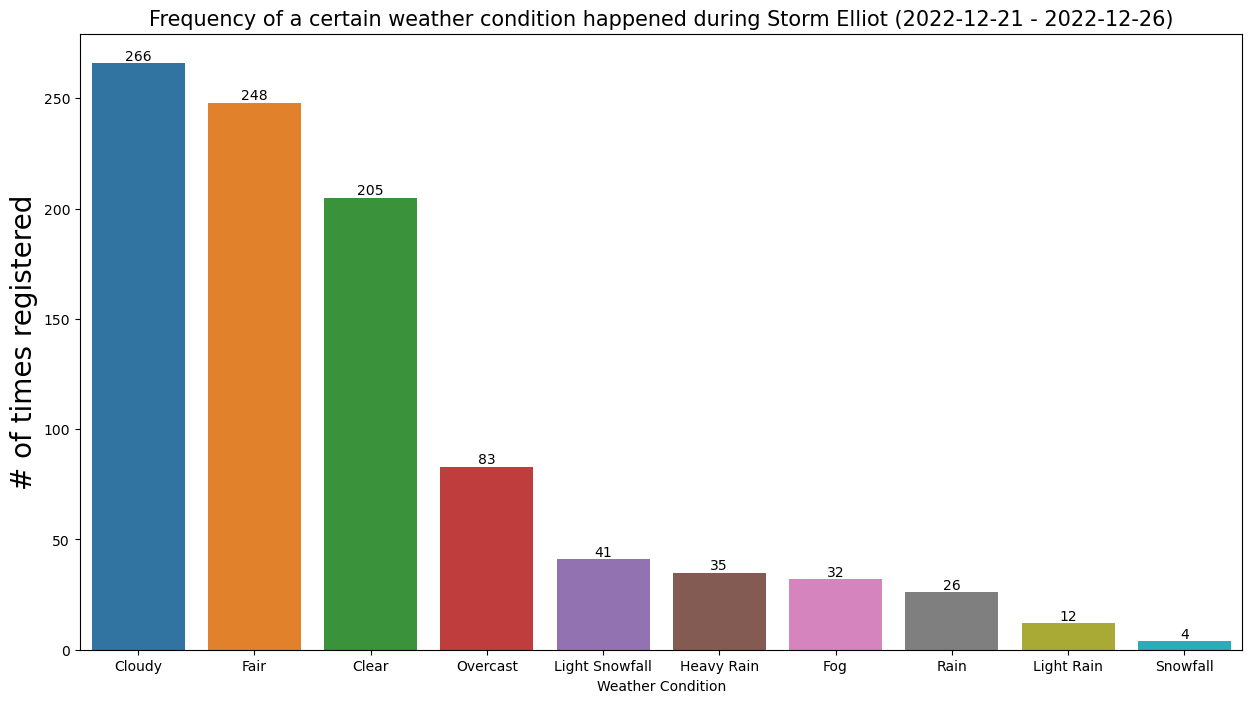

In [11]:
# charting weather conditions during the storm period
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x= df_condition_events['weather_condition'], y=df_condition_events['count'])
f1.tick_params(axis='x', rotation=None) # get x-ticks and rotate them
f1.set_xlabel('Weather Condition') # set no label for x-axis 
f1.bar_label(f1.containers[0])
f1.set_ylabel("# of times registered", fontsize = 20); # set label for y-axis
f1.set_title('Frequency of a certain weather condition happened during Storm Elliot (2022-12-21 - 2022-12-26)', fontsize=15); # set title

#### 4.2. KPI: Daily Flight Cancellations and Delays During Storm Period

In [ ]:
# Convert the flight_date column to a datetime data type
cancelled_by_date['flight_date'] = pd.to_datetime(cancelled_by_date['flight_date'])
delayed_by_date['flight_date'] = pd.to_datetime(delayed_by_date['flight_date'])

# Set the figure size and style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.style.use('seaborn-whitegrid')

# Create the line charts
plt.plot(cancelled_by_date['flight_date'], cancelled_by_date.iloc[:, 0], label='Cancelled Flights')
plt.plot(delayed_by_date['flight_date'], delayed_by_date.iloc[:, 0], label='Delayed Flights')

# Add a title and axis labels
plt.title('Daily Flight Cancellations and Delays')
plt.xlabel('Date')
plt.ylabel('Count')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### KPI: Total Number of Flights Cancelled Categorized by Airports During Storm Period

In [ ]:
# defining the query to assess weather conditions 
sql_query = f"SELECT origin, count(cancelled) FROM {schema}.flights_api_sql_group3_final WHERE origin IN ('ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'EWR', 'LGA') AND flight_date IN ('2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26') Group by 1"

df_cancelled_flights_by_airport =get_dataframe(sql_querry)

In [ ]:
# visualization

plt.figure(figsize=(13,7)) # specify figure size
plt.style.use('fivethirtyeight')
f1 = sns.barplot(x= df_cancelled_flights_by_airport['origin'], y=df_cancelled_flights_by_airport['count'])
f1.tick_params(axis='x', rotation=80) # get x-ticks and rotate them
f1.set_xlabel('Airports') # set no label for x-axis 
f1.bar_label(f1.containers[0])
f1.set_ylabel("cancelled # of flights", fontsize = 10); # set label for y-axis
#f1.set_xticklabels(['Atlanta International Airport', 'Denver International Airport', 'Dallas Fort Worth International Airport', 'Newark Liberty International Airport', 'JFK International Airport', 'Los Angeles International Airport', 'La Guardia Airport (NY)', 'Chicago OHare International Airport'])
f1.set_title('Total number of cancelled flights categorized by airports during the storm  Elliott (2022-12-21 - 2022-12-26)', fontsize=15); # set title (edited) 

#### 4.3. KPI: Total Flights Cancelled (Grouped by Airline) During Storm

In [ ]:
sql_query_2 = f"SELECT airline, count(cancelled) FROM {schema}.flights_api_sql_group3_final WHERE origin IN ('ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'EWR', 'LGA') AND flight_date IN ('2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26' ) GROUP BY 1 ORDER BY 2 DESC”

df_cancelled_flights_by_airline = get_dataframe(sql_query_2)

In [ ]:
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.barplot(x= df_cancelled_flights_by_airline['airline'], y=df_cancelled_flights_by_airline['count'])
f1.tick_params(axis='x', rotation=80) # get x-ticks and rotate them
f1.set_xlabel('Airlines') # set no label for x-axis
f1.bar_label(f1.containers[0])
f1.set_ylabel("cancelled # of flights", fontsize = 10); # set label for y-axis
f1.set_xticklabels(labels=['Delta Air Lines','United Airlines Cargo', 'American Airlines', 'Southwest Airlines', 'Sky West Airlines', 'Republic Airways', 'IATA Designator', 'Envoy Air','Endeavor Air','Spirit Airlines','Frontier Airlines','Alaska Airlines','Mesa Airlines','Hawaiian Airlines','Allegiant Air','Comair', 'Horizon Air'])
f1.set_title('Total number of flights cancelled categorized by airlines during the storm  Elliot (2022-12-21 - 2022-12-26)', fontsize=15); # set title (edited) 

#### 4.4. KPI: Total Flights Cancelled and Avg Minutes of Delay in December - YoY Comparison

In [ ]:
plt.style.use('fivethirtyeight') 
ig, ax = plt.subplots(figsize=(15,8))
plt.suptitle('Avg Minutes Delay and Total Flight Cancelations YoY"', fontsize=20)


# plot line graph on axis #1
ax1 = sns.barplot(x= df_yoy_cancelled['date_part'], y=df_yoy_cancelled['sum'])
ax1.set_xticklabels(labels=["2018", "2019", "2020", "2021", "2022"])
ax1.set_title('Data: December 2018 - 2022', fontsize=15) 

ax1.set_xlabel('Year')
ax1.set_ylabel('Cancelled Flights')
ax1.set_ylim(0, 13000)

ax1.legend(['# of Cancelled flights'], loc="upper center")
ax1.grid(b=False)
ax1.bar_label(ax.containers[0]) #Adding values to the bars

ax2 = ax1.twinx() # set up the 2nd axis

# plot pointplot line on axis #2 Pointplot. Pointplot treats the x variable as categorical, similar to barplot.
# Average Delay in Minutes
sns.pointplot( 
    x= df_yoy_avg['year'],
    y= df_yoy_avg['total_delay_min'], ci=None,
    data= df_yoy_avg['year'],
    sort=False, ax=ax2, scale=0.5)
ax2.grid(b=False) # turn off grid #2
ax2.set_xlabel('Year')
ax2.set_ylabel('Avg Minutes of Delay')
ax2.legend(['Avg Minutes of Delay'], loc="upper left")